### Deliverable 1: Preprocessing the Data for a Neural Network

In [122]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [123]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
appli_df = application_df.drop(columns=['EIN','NAME'])
appli_df.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [124]:
# Determine the number of unique values in each column.
appli_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [126]:
# Look at APPLICATION_TYPE value counts for binning
apptypes = appli_df['APPLICATION_TYPE'].value_counts()
apptypes

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

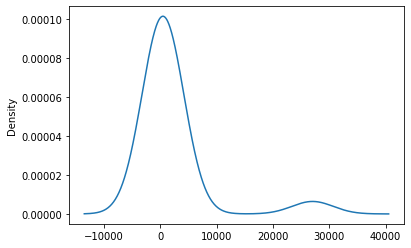

In [127]:
import matplotlib.pyplot as plt

# Visualize the value counts of APPLICATION_TYPE
apptypes.plot.density()

In [128]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptypes[apptypes < 500].index)

# Replace in dataframe
for app in replace_application:
    appli_df.APPLICATION_TYPE = appli_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
appli_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [130]:
# Look at CLASSIFICATION value counts for binning
classifications = application_df['CLASSIFICATION'].value_counts()
classifications

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C8210        1
C1370        1
C2570        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

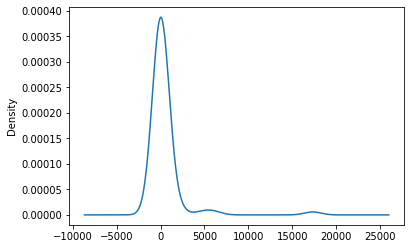

In [131]:
# Visualize the value counts of CLASSIFICATION
classifications.plot.density()

In [133]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classifications[classifications < 1500].index)

# Replace in dataframe
for cls in replace_class:
    appli_df.CLASSIFICATION = appli_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
appli_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [141]:
appli_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [145]:
# Generate our categorical variable lists
uniques = appli_df.nunique()
catvars = list(uniques[uniques > 2].index)
catvars

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT']

In [207]:
catlist = catvars[0:6]
catlist

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [174]:
catlist[2]

'CLASSIFICATION'

In [249]:
encoder_df = appli_df.filter(items=['STATUS','ASK_AMT','IS_SUCCESSFUL'])
encoder_df

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1
...,...,...,...
34294,1,5000,0
34295,1,5000,0
34296,1,5000,0
34297,1,5000,1


In [250]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
encoder_df = appli_df.filter(items=['STATUS','ASK_AMT','IS_SUCCESSFUL'])
# Fit and transform the OneHotEncoder using the categorical variable list
for category in catlist:
  coded_df = pd.DataFrame(enc.fit_transform(appli_df[category].values.reshape(-1,1)), columns=enc.get_feature_names([category]))
  encoder_df = encoder_df.merge(coded_df,left_index=True,right_index=True)
    
# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names([catlist])
encoder_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [251]:
len(encoder_df.columns)

42

In [252]:
# Split our preprocessed data into our features and target arrays
y = encoder_df['IS_SUCCESSFUL']
X = encoder_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [253]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [255]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
in_feats = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=in_feats, activation='tanh'))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [260]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [263]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.7216
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7287
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.7286
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7315
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7318
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5467 - accura

In [264]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5595 - accuracy: 0.7359
Loss: 0.5595066547393799, Accuracy: 0.7358600497245789


In [265]:
#let's try optimizing by taking cost out of the equation. very 
opttry1_df = encoder_df.drop(columns=['ASK_AMT'])
opttry1_df.head(4)

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
# Split our preprocessed data into our features and target arrays
y = opttry1_df['IS_SUCCESSFUL']
X = opttry1_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [268]:
in_feats = len(X_train_scaled[0])

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=80, input_dim=in_feats, activation='tanh'))
# Second hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Third hidden layer!
nn_opt1.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn_opt1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_opt1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3360      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 6,111
Trainable params: 6,111
Non-trainable params: 0
_________________________________________________________________


In [269]:
# Compile the model
nn_opt1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [270]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7389
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7387
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7373
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7380
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7386
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7386
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.7372
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.7386
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7377
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accura

In [271]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5711 - accuracy: 0.7340
Loss: 0.5710740685462952, Accuracy: 0.73399418592453


In [ ]:
#wow that was worse

In [287]:
encoder_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [289]:
colms = list(encoder_df.columns)
colms

['STATUS',
 'ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_

In [296]:
colms[18:24]

['CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other']

In [299]:
#let's try taking classification out 
opttry2_df = encoder_df.drop(columns=colms[18:24])
opttry2_df.head(4)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
# Split our preprocessed data into our features and target arrays
y = opttry2_df['IS_SUCCESSFUL']
X = opttry2_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [306]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [307]:
in_feats = len(X_train_scaled[0])

nn_opt2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=80, input_dim=in_feats, activation='tanh'))
# Second hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Third hidden layer!
nn_opt2.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn_opt2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_opt2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 80)                2880      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 5,631
Trainable params: 5,631
Non-trainable params: 0
_________________________________________________________________


In [308]:
# Compile the model
nn_opt2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [309]:
# Train the model
fit_model = nn_opt2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5931 - accuracy: 0.7100
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5722 - accuracy: 0.7234
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5668 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5624 - accuracy: 0.7301
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5665 - accuracy: 0.7261
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5637 - accuracy: 0.7276
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5645 - accuracy: 0.7277
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5664 - accuracy: 0.7253
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5646 - accuracy: 0.7288
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5630 - accura

In [311]:
model_loss, model_accuracy = nn_opt2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5728 - accuracy: 0.7265
Loss: 0.5728040337562561, Accuracy: 0.7265306115150452


In [273]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=855458c90f9a0060748633268b4a91b62062800ff83fe7fc9627883b34934f7d
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=4099beef9f922ec16267dc551bd3e149a4bb23952dd98d8290f7f0cb7b8999b6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [312]:
# Split our preprocessed data into our features and target arrays
y = encoder_df['IS_SUCCESSFUL']
X = encoder_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [313]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [314]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_tunmod = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_tunmod.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_tunmod.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_tunmod.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_tunmod.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_tunmod

In [315]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [283]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 27s]
val_accuracy: 0.7344606518745422

Best val_accuracy So Far: 0.7358600497245789
Total elapsed time: 00h 10m 26s
INFO:tensorflow:Oracle triggered exit


In [284]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 7,
 'num_layers': 6,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_0': 7,
 'units_1': 7,
 'units_2': 5,
 'units_3': 5,
 'units_4': 7,
 'units_5': 1}

In [285]:
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5766 - accuracy: 0.7359
Loss: 0.5766069293022156, Accuracy: 0.7358600497245789


In [ ]:
#let's see what kt does while upscaled

In [316]:
# Split our preprocessed data into our features and target arrays
y = encoder_df['IS_SUCCESSFUL']
X = encoder_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [317]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [319]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
in_feats = len(X_train_scaled[0])

nn_opt3 = tf.keras.models.Sequential()

# First hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=7, input_dim=in_feats, activation='sigmoid'))
# Second hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=7, activation='sigmoid'))
nn_opt3.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
nn_opt3.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
nn_opt3.add(tf.keras.layers.Dense(units=7, activation='sigmoid'))


# Output layer
nn_opt3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_opt3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 294       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 470
Trainable params: 470
Non-trainable params: 0
________________________________________________________

In [320]:
# Compile the model
nn_opt3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [321]:
fit_model = nn_opt3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.7123 - accuracy: 0.5295
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6502 - accuracy: 0.6522
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5832 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5851 - accuracy: 0.7241
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5794 - accuracy: 0.7295
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.7258
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5812 - accuracy: 0.7255
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5799 - accuracy: 0.7266
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5757 - accuracy: 0.7285
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5771 - accura

In [322]:
model_loss, model_accuracy = nn_opt3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5521 - accuracy: 0.7329
Loss: 0.5520737767219543, Accuracy: 0.7329446077346802
